In [1]:
from metrics.evaluate import evaluate_schedule 
import pandas as pd 
#from optimization.CArBO import _compute_global_sets
from globals.build_global_sets import normalize_and_merge,compute_early_slot_penalties , compute_co_enrollment,compute_slot_structures, compute_student_unique
from config.settings import NUM_SLOTS, DATA_PATH

run_name:  first
ASSIGNMENT_TYPE:  block
semester ,  sp25
co     Unnamed: 0  72-0103  1-9185  MLG17  1-8222  1-6240  1-5549  1-8021  \
0      72-0103        0       1     52       0       1       1       0   
1       1-9185        1       0      0       0       0       0       0   
2        MLG17       52       0      0       0      15       0       0   
3       1-8222        0       0      0       0       1       0       0   
4       1-6240        1       0     15       1       0       2       0   
..         ...      ...     ...    ...     ...     ...     ...     ...   
561     1-9455        0       0      0       0       0       0       0   
562     1-0003        0       0      0       0       0       0       0   
563    1-21192        0       0      0       0       0       0       0   
564     1-9034        0       0      0       0       0       0       0   
565    1-19927        0       0      0       0       0       0       0   

     1-8767  1-8181  ...  1-10951  1-9806  1-0055 

In [3]:
from metrics.evaluate import evaluate_schedule 
import pandas as pd 
#from optimization.CArBO import _compute_global_sets
from globals.build_global_sets import normalize_and_merge,compute_early_slot_penalties , compute_co_enrollment,compute_slot_structures, compute_student_unique
from config.settings import NUM_SLOTS, DATA_PATH
def compute_global_sets( ba_adj, by_student_block):
        """
        From the adjusted block assignment (ba_adj) and by_student_block,
        compute co‐enrollment, unique block counts, slot structures, early slots, etc.
        Returns a single global_sets dict to pass to the objective.
        """
        print("Building co‐enrollment counts …")
        #pairwise, triple, quadruple = compute_co_enrollment(by_student_block)

        print("Building student‐unique block counts …")
        #student_unique_block, student_unique_block_pairs = compute_student_unique(
        #    by_student_block, num_slots=NUM_SLOTS
        #)

        print("Building slot structures …") 
        slot_structures = compute_slot_structures(list(range(1, NUM_SLOTS + 1)))

        print("Computing early‐slot penalties …")
        first_list = compute_early_slot_penalties(num_slots=NUM_SLOTS)

        global_sets = {
            **slot_structures,
            "first_list": first_list,
            #"student_unique_block": student_unique_block,
            #"student_unique_block_pairs": student_unique_block_pairs,
            #"pairwise": pairwise,
            #"triple": triple,
            #"quadruple": quadruple,
            "block_assignment": ba_adj,
        }
        return global_sets

In [4]:
sched = pd.read_csv('/home/asj53/BOScheduling/results/fa24/schedules/20250615_184230i6-dbd371da188ade0965a135b34522542c.csv')
sizes = pd.read_csv('/home/asj53/BOScheduling/data/fa24/exam_sizes.csv')
exam_df = pd.read_csv('/home/asj53/BOScheduling/data/fa24/exam_df.csv')
ba_adj, by_student_block = normalize_and_merge(sched, exam_df)
global_sets = compute_global_sets(ba_adj, by_student_block)

evaluate_schedule(sched, sizes,[], global_sets)

/tmp/ipykernel_3439088/2098734445.py:3: DtypeWarning: Columns (5,30,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  exam_df = pd.read_csv('/home/asj53/BOScheduling/data/fa24/exam_df.csv')


ba     Exam Group  Exam Block  slot      exam  size  b2bs  confs  2i3s  \
0     7W2-0103           4    10  7W2-0103    33     3      2     3   
1       1-4874          12    10    1-4874   224    32      8    52   
2       1-7488           1     1    1-7488    65     3      2     8   
3       1-7425           1     1    1-7425   352    16     10    27   
4       1-9100          12    10    1-9100   142    10      4    32   
..         ...         ...   ...       ...   ...   ...    ...   ...   
569     1-5140          24    24    1-5140    10     0      0     0   
570    1-20780           4     9   1-20780    12     0      0     0   
571     1-2485           1     1    1-2485   106     0      0     0   
572     1-7356          15    13    1-7356     4     0      0     0   
573     1-5199          11    18    1-5199     3     0      0     0   

            score  score_norm  
0     2005.430442   60.770619  
1     8074.127665   36.045213  
2     2009.481179   30.915095  
3    10037.87398

,conflicts,quints,quads,four in five slots,triple in 24h (no gaps),triple in same day (no gaps),three in four slots,evening/morning b2b,other b2b,two in three slots,singular late exam,"two exams, large gap",avg_max,lateness
0,130,0,0,0,9,0,9,77,204,160,1796,82,16.094291,39204


In [9]:
initial = pd.read_csv('/home/asj53/BOScheduling/results/sp25/schedules/INITIAL20250616_075945i134-8050ad296a0f3c11c452cdc40cedc4e7.csv')
initial

,Exam Group,Exam Block,slot,exam,size,b2bs,confs,2i3s,score,score_norm
0,1-8503,22,13,1-8503,16,0,6,15,6013.389637,375.836852
1,1-7204,4,18,1-7204,26,0,4,24,4021.423420,154.670132
2,1-9416,22,13,1-9416,13,2,2,4,2005.570570,154.274659
3,1-7496,4,18,1-7496,246,58,16,56,16107.987980,65.479626
4,1-8573,22,13,1-8573,184,14,10,90,10094.337825,54.860532
...,...,...,...,...,...,...,...,...,...,...
565,1-5799,4,18,1-5799,7,0,0,0,0.000000,0.000000
566,1-19222,19,21,1-19222,15,0,0,0,0.000000,0.000000
567,1-4847,19,21,1-4847,2,0,0,0,0.000000,0.000000
568,1-10948,1,15,1-10948,2,0,0,0,0.000000,0.000000


In [8]:
shi = pd.read_csv('/home/asj53/BOScheduling/results/fa24/schedules/20250615_184230i6-dbd371da188ade0965a135b34522542c.csv')
shi

,Exam Group,Exam Block,slot,exam,size,b2bs,confs,2i3s,score,score_norm
0,7W2-0103,4,10,7W2-0103,33,3,2,3,2005.430442,60.770619
1,1-4874,12,10,1-4874,224,32,8,52,8074.127665,36.045213
2,1-7488,1,1,1-7488,65,3,2,8,2009.481179,30.915095
3,1-7425,1,1,1-7425,352,16,10,27,10037.873980,28.516687
4,1-9100,12,10,1-9100,142,10,4,32,4035.924717,28.422005
...,...,...,...,...,...,...,...,...,...,...
569,1-5140,24,24,1-5140,10,0,0,0,0.000000,0.000000
570,1-20780,4,9,1-20780,12,0,0,0,0.000000,0.000000
571,1-2485,1,1,1-2485,106,0,0,0,0.000000,0.000000
572,1-7356,15,13,1-7356,4,0,0,0,0.000000,0.000000


In [23]:
len(set(pd.read_csv(DATA_PATH + '/p_co.csv').columns).intersection(sched['Exam Group'].unique()))

571

In [29]:
len(set(exam_df['Exam Key'].unique()).intersection(set(sched['Exam Group'].unique())))

571

In [30]:
by_student_block

,anon-netid,blocks
0,000279c14597e9bf8203507e495a64e8bb2981882345ad...,[24.0]
1,00060e16a9da02bae952cd7c819c9e0d23d84decd34e25...,"[24.0, 13.0]"
2,000db0bf1f1962410318034c86c73b2f6863b4ad3d0fff...,"[5.0, 24.0, 16.0]"
3,001184373e2526855382766f23aca52414dc6fe4cb3e8a...,"[24.0, 21.0, 11.0, 1.0, 15.0]"
4,0015240146e98cfa93874b3a4e88243399bc350e92138c...,"[4.0, 10.0, 20.0, 5.0]"
...,...,...
18312,ffe7a78ebf0f6bd3a6ad73abaf0996e70bb2d12261e24e...,"[22.0, 2.0, 21.0]"
18313,ffed45a8cfc6332450696e04fce517db8be4b50a2efeac...,"[2.0, 7.0, 12.0, 14.0, 24.0]"
18314,fff3d6f9f94b1ff05ed5c69d71a2d5a0eaf4fdf3483169...,"[18.0, 10.0]"
18315,fff80d08cb2f7789171460d5a4691fec941ce17971e75c...,"[7.0, 17.0, 23.0, 16.0]"


In [14]:
#sched = pd.read_csv('/home/asj53/BOScheduling/results/fa24/blocks/minnum_blocks22size_cutoff300frontloading1.csv')
#sched['slot'] = sched['Exam Block'] 
sched = pd.read_csv('/home/asj53/BOScheduling/results/sp25/schedules/20250616_075945i134-8050ad296a0f3c11c452cdc40cedc4e7.csv')

sizes = pd.read_csv('/home/asj53/BOScheduling/data/sp25/exam_sizes.csv')
exam_df = pd.read_csv('/home/asj53/BOScheduling/data/sp25/exam_df.csv')
ba_adj, by_student_block = normalize_and_merge(sched, exam_df)
global_sets = compute_global_sets(ba_adj, by_student_block)

evaluate_schedule(sched, sizes,[], global_sets)

/tmp/ipykernel_3439088/791980474.py:6: DtypeWarning: Columns (22,24) have mixed types. Specify dtype option on import or set low_memory=False.
  exam_df = pd.read_csv('/home/asj53/BOScheduling/data/sp25/exam_df.csv')


ba     Exam Group  Exam Block  slot     exam  size  b2bs  confs  2i3s  \
0        MLG59           2    16    MLG59    71    16      1     9   
1        MLG38           7    11    MLG38    77    13      1    20   
2      1-18028           7    11  1-18028   309    11      1   130   
3        MLG56           2    16    MLG56   511    56      1    23   
4       1-1989          21    20   1-1989    46    20      0    31   
..         ...         ...   ...      ...   ...   ...    ...   ...   
565     1-6971          16     1   1-6971    10     0      0     0   
566    1-10948           1    15  1-10948     2     0      0     0   
567     1-7721           1    15   1-7721    20     0      0     0   
568    1-18202           1     1  1-18202    23     0      0     0   
569     1-8093           8    10   1-8093     4     0      0     0   

           score  score_norm  
0    1024.033782   14.423011  
1    1030.852850   13.387699  
2    1127.043525    3.647390  
3    1076.530777    2.106714  
4

,conflicts,quints,quads,four in five slots,triple in 24h (no gaps),triple in same day (no gaps),three in four slots,evening/morning b2b,other b2b,two in three slots,singular late exam,"two exams, large gap",avg_max,lateness
0,318,0,1,0,50,24,276,677,1161,2485,973,771,16.631988,47352


In [ ]:
faco = pd.read_csv('/home/asj53/BOScheduling/data/fa24/p_co.csv')
faco

,Unnamed: 0,1-8545,1-7943,1-8611,1-18956,1-19133,1-8121,MLG58,1-11209,MLG59,...,1-19192,1-5713,1-7910,1-10217,1-5965,1-4387,1-9584,1-3100,1-4618,1-5714
0,1-8545,0,3,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1-7943,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1-8611,1,0,0,10,1,13,5,0,5,...,0,0,0,0,0,0,0,0,0,0
3,1-18956,0,0,10,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1-19133,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,1-4387,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
572,1-9584,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
573,1-3100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
574,1-4618,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
spco = pd.read_csv('/home/asj53/BOScheduling/data/sp25/p_co.csv')
spco

,Unnamed: 0,72-0103,1-9185,MLG17,1-8222,1-6240,1-5549,1-8021,1-8767,1-8181,...,1-10951,1-9806,1-0055,1-5914,1-0027,1-9455,1-0003,1-21192,1-9034,1-19927
0,72-0103,0,1,52,0,1,1,0,33,1,...,0,1,0,0,0,0,0,0,0,0
1,1-9185,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,MLG17,52,0,0,0,15,0,0,37,4,...,0,0,3,0,0,0,0,0,0,0
3,1-8222,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1-6240,1,0,15,1,0,2,0,1,2,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,1-9455,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
562,1-0003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
563,1-21192,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
564,1-9034,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import os 
from datetime import datetime 
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import glob
import re
import pandas as pd 
import pygmo as pg

def extract_i_number(path: str) -> int:
    """
    Extracts the integer immediately following the first 'i' after the timestamp
    in a filename under the /home/asj53/BOScheduling/results/sp25/metrics directory.

    Returns:
        The extracted integer, or raises ValueError if not found.
    """
    # This regex looks for:
    #  - the fixed prefix up through “metrics/”
    #  - an 8-digit date, underscore, 6-digit time: \d{8}_\d{6}
    #  - the letter 'i'
    #  - a capture group of 1–5 digits: (\d{1,5})
    pattern = (
        r"/home/asj53/BOScheduling/results/sp25/metrics/"
        r"\d{8}_\d{6}"
        r"i(\d{1,5})"
    )
    m = re.search(pattern, path)
    if not m:
        raise ValueError(f"No matching 'i<digits>' segment found in {path!r}")
    return int(m.group(1))
def hypervolume():
    """
    Scan metric CSVs in a time window, compute the non-dominated front hypervolume progression,
    and plot raw, normalized, log10, percent-gain, and Pareto-set size over iterations.
    """
    # ---- Configuration ----
    base_dir   = "/home/asj53/BOScheduling/results/sp25/metrics"
    model      = "eubo"
    pattern    = os.path.join(base_dir, f"20250617*{model}*.csv")
    start_iter, end_iter = 0, 200  # numeric bounds on i-values

    ref_point  = np.array([
        1, 10, 30, 30, 100, 100, 1000, 2000,
        2000, 5000, 2000, 2000, 20, 60000
    ], dtype=float)
    objectives = [
        'conflicts', 'quints', 'quads', 'four in five slots',
        'triple in 24h (no gaps)', 'triple in same day (no gaps)',
        'three in four slots', 'evening/morning b2b', 'other b2b',
        'two in three slots', 'singular late exam',
        'two exams, large gap', 'avg_max', 'lateness'
    ]

    # ---- Gather and dedupe by iteration number ----
    csv_by_iter = {}
    for path in sorted(glob.glob(pattern)):
        try:
            i_num = extract_i_number(path)
        except ValueError:
            continue
        if start_iter <= i_num <= end_iter:
            csv_by_iter.setdefault(i_num, path)

    # ---- Compute HV progression ----
    records   = []
    full_vol  = np.prod(ref_point)
    prev_norm = None
    all_pts   = np.empty((0, len(objectives)), dtype=float)

    for iteration in sorted(csv_by_iter):
        df  = pd.read_csv(csv_by_iter[iteration])
        pts = df.reindex(columns=objectives).dropna().values
        if pts.size == 0:
            continue

        # accumulate and dedupe
        all_pts = np.unique(np.vstack((all_pts, pts)), axis=0)

        # identify non-dominated front
        is_pareto = np.array([
            not any((np.all(q <= p) and np.any(q < p)) 
                    for q in all_pts if not np.array_equal(q, p))
            for p in all_pts
        ])
        front = all_pts[is_pareto]
        if front.size == 0:
            continue

        # adjust reference point if exceeded
        max_vals = front.max(axis=0)
        mask     = ref_point[:front.shape[1]] <= max_vals
        if mask.any():
            ref_point[mask] = max_vals[mask] * 1.1

        # hypervolume calculations
        hv_calc = pg.hypervolume(front.tolist())
        raw_hv  = hv_calc.compute(ref_point[:front.shape[1]].tolist())
        norm_hv = raw_hv / full_vol
        log_hv  = np.log10(norm_hv + 1e-30)
        pct_gain = ((norm_hv - prev_norm) / prev_norm * 100) if prev_norm else 0.0
        prev_norm = norm_hv

        records.append({
            'iteration':  iteration,
            'raw_hv':      raw_hv,
            'norm_hv':     norm_hv,
            'log10_hv':    log_hv,
            'pct_gain':    pct_gain,
            'pareto_size': front.shape[0]
        })

    # ---- Build DataFrame and save ----
    results = pd.DataFrame(records).sort_values('iteration')
    print('RESULTS ,', results)
    results.to_csv(f"hypervol_progression_{model}.csv", index=False)

    # ---- Plot progression ----
    fig, axes = plt.subplots(5, 1, figsize=(14, 20), sharex=True)
    x = results['iteration']

    axes[0].plot(x, results['raw_hv'],       '-o'); axes[0].set_title("Raw Hypervolume")
    axes[1].plot(x, results['norm_hv'],      '-o'); axes[1].set_title("Normalized Hypervolume")
    axes[2].plot(x, results['log10_hv'],     '-o'); axes[2].set_title("log₁₀(Normalized HV)")
    axes[3].plot(x, results['pct_gain'],     '-o'); axes[3].set_title("Δ% Normalized HV")
    axes[4].plot(x, results['pareto_size'],  '-o'); axes[4].set_title("Pareto-set Size")

    for ax in axes:
        ax.grid(True)

    plt.tight_layout()
    plt.savefig(f"hypervol_progression_{model}.png")
    plt.show()


RESULTS ,     iteration        raw_hv   norm_hv  log10_hv       pct_gain  pareto_size
0           1  2.152941e+30  0.000249 -3.603482       0.000000            1
1           2  3.781350e+33  0.437656 -0.358867  175536.512728            2
2           3  4.087581e+33  0.473100 -0.325047       8.098465            3
3           4  5.100850e+33  0.590376 -0.228871      24.788956            4
4           5  5.600206e+33  0.648172 -0.188310       9.789662            5
5           6  5.630133e+33  0.651636 -0.185995       0.534401            6
6           7  5.653784e+33  0.654373 -0.184175       0.420073            7
7           8  5.766053e+33  0.667367 -0.175635       1.985737            8
8           9  6.731369e+33  0.779094 -0.108410      16.741365            9
9          10  7.084473e+33  0.819962 -0.086206       5.245649           10
10         11  7.480593e+33  0.865809 -0.062578       5.591375           11
11         12  7.559137e+33  0.874900 -0.058041       1.049980           12
12

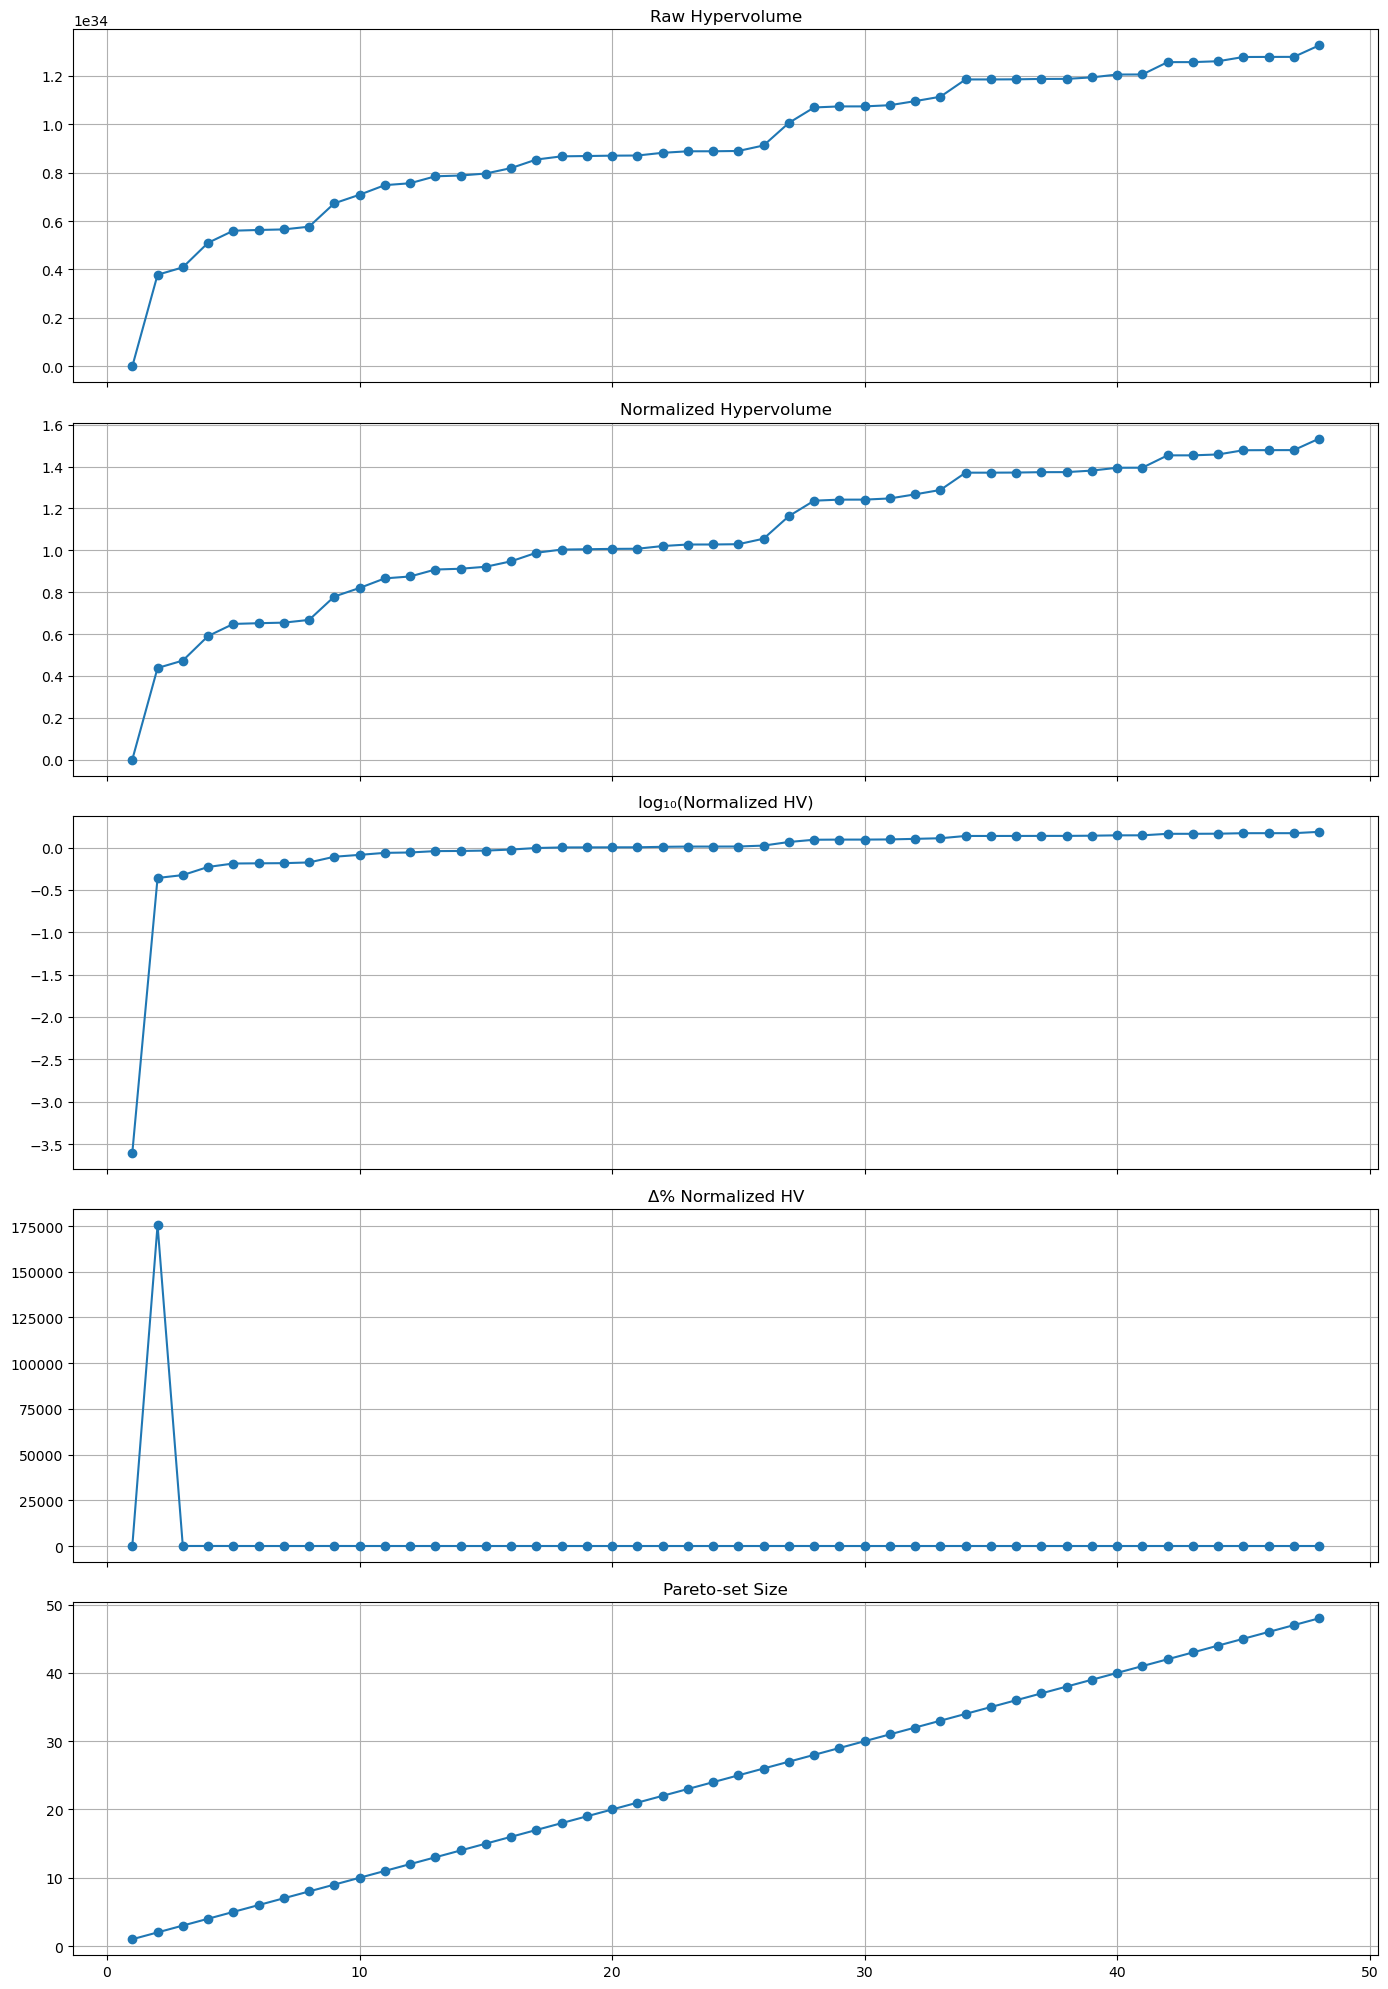

In [2]:
hypervolume()

In [ ]:
import os
import glob
import re

import numpy as np
import pandas as pd

def extract_i_number(path: str) -> int:
    """
    Extracts the integer immediately following the first 'i' after the timestamp
    in a filename under the /home/asj53/BOScheduling/results/sp25/metrics directory.
    """
    pattern = (
        r"/home/asj53/BOScheduling/results/sp25/metrics/"
        r"\d{8}_\d{6}"
        r"i(\d{1,5})"
    )
    m = re.search(pattern, path)
    if not m:
        raise ValueError(f"No matching 'i<digits>' segment found in {path!r}")
    return int(m.group(1))

def compute_utilities_by_iteration(
    base_dir: str,
    model: str,
    objectives: list,
    start_iter: int = 0,
    end_iter: int = 200,
) -> pd.DataFrame:
    # build the glob pattern
    print(model , 'model')
    pattern = os.path.join(base_dir, f"20250617_123816agh*.csv")

    # gather one file per iteration
    csv_by_iter = {}
    for path in sorted(glob.glob(pattern)):
        try:
            i_num = extract_i_number(path)
        except ValueError:
            continue
        if start_iter <= i_num <= end_iter:
            csv_by_iter.setdefault(i_num, path)

    # read, sum, and record
    records = []
    for iteration in sorted(csv_by_iter):
        df = pd.read_csv(csv_by_iter[iteration])
        # drop any rows with missing objective values
        df_obj = df.reindex(columns=objectives).dropna()
        if df_obj.empty:
            continue

        # compute utility = sum of all objective columns, per row
        util_vals = df_obj.sum(axis=1)
        for u in util_vals:
            records.append({
                "iteration": iteration,
                "utility": float(u)
            })
    print(records)
    return pd.DataFrame(records).sort_values("iteration")


base_dir = "/home/asj53/BOScheduling/results/sp25/metrics"
model    = "agh"
objectives = [
    'conflicts', 'quints', 'quads', 'four in five slots',
    'triple in 24h (no gaps)', 'triple in same day (no gaps)',
    'three in four slots', 'evening/morning b2b', 'other b2b',
    'two in three slots', 'singular late exam',
    'two exams, large gap', 'avg_max', 'lateness'
]

df_utils = compute_utilities_by_iteration(base_dir, model, objectives)
print(df_utils.head())
df_utils.to_csv(f"utilities_by_iteration_{model}.csv", index=False)


agh model
[]


KeyError: 'iteration'

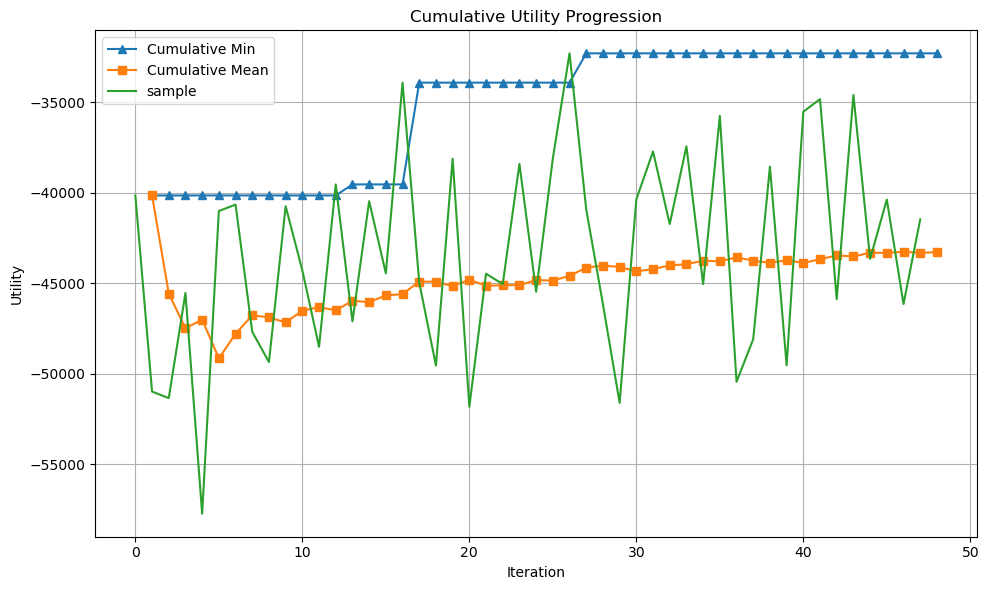

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your utilities CSV (or use your existing df_utils)
df_utils = pd.read_csv("utilities_by_iteration_eubo.csv")

# Ensure sorted by iteration
df_utils = df_utils.sort_values("iteration")

# Get the sorted list of unique iterations
iters = sorted(df_utils["iteration"].unique())

# Preallocate
cum_min  = []
cum_mean = []

# For each iteration, take all utilities up to & including that iteration
for it in iters:
    sub = df_utils[df_utils["iteration"] <= it]["utility"]
    cum_min.append(-sub.min())
    cum_mean.append(-sub.mean())
    #sample.append(['utility'])
df_utils['utility'] = - df_utils['utility'] 
# Plot cumulative min & mean
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(iters, cum_min,  marker="^", label="Cumulative Min")
ax.plot(iters, cum_mean, marker="s", label="Cumulative Mean")
ax.plot(df_utils['utility'], label = 'sample')
ax.set_xlabel("Iteration")
ax.set_ylabel("Utility")
ax.set_title("Cumulative Utility Progression")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

